# Process the full txt file

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib
import plotly.io as pio
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import mne
import mne_bids

from scipy import signal
from scipy.signal import lfilter
from pyentrp import entropy as ent

BaseFileName:0014;
FileOrder:1;

StartSample:0;

HardwareChannelNumbers:66;

Channels:1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,65;

ChannelType:,,,,,,,,,,,,,,,,,,,,,,,,,,,,;

ChannelName:Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,Ch8,Ch9,Ch10,Ch11,Ch12,Ch13,Ch14,Ch15,Ch16,Ch17,Ch18,Ch19,Ch20,Ch21,Ch22,Ch23,Ch24,Ch25,Ch26,Ch27,Ch28,Event1;

ChannelSampleRate:1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000;

ChannelResolution:24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24;

ChannelGain:4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4;

ChannelRange:9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9;

In [2]:
df = pd.read_csv("data/0014.txt", sep='\t', index_col=False, header=0)

In [3]:
# Notch filter

sampling_rate = 1000 # samples per second
notch_freq = 50 # Hz
notch_bw = 2 # Hz

eeg_mask = df.columns != 'EVENT1'

b, a = signal.iirnotch(notch_freq, notch_bw, sampling_rate)
filtered_data = signal.lfilter(b, a, df.loc[:, eeg_mask], axis=0)
filtered_df = df.copy()
filtered_df.loc[:, eeg_mask] = filtered_data
filtered_df

CH1        CH2        CH3        CH4        CH5        CH6  \
0      -20.487592 -20.172398 -21.340469 -12.941483 -15.954364 -13.775819   
1      -16.633901 -16.714724 -18.128591 -11.377256 -13.851502 -12.021642   
2      -11.301531  -8.129235 -13.246127  -7.767518  -9.914488  -8.302689   
3       -3.258057   8.548951  -5.677308  -0.835323  -2.990483  -1.373596   
4        7.010623  32.087692   4.145662   9.109353   6.505750   8.375998   
...           ...        ...        ...        ...        ...        ...   
275554   9.272377   1.131060   3.079071   4.213771   6.602788   1.265128   
275555  10.197829   3.064915   4.149438   5.962762   7.590856   2.730565   
275556  10.533188   3.552511   4.379474   6.614871   7.703730   3.209485   
275557  10.793110   3.516790   4.284659   6.501758   7.456593   3.040030   
275558  11.648695   4.123880   4.680140   6.633174   7.639918   3.097804   

              CH7        CH8        CH9       CH10  ...       CH20       CH21  \
0      -15.861660 -15.657711 -16.510589 -18.142180  ... -24.177212 -19.291710   
1      -13.400847 -13.456962 -13.913367 -15.439045  ... -20.432602 -16.466128   
2       -8.838443  -9.225548  -9.525046 -10.993326  ... -15.122321 -11.855347   
3       -0.846283  -1.619225  -2.071749  -3.550343  ...  -6.996749  -4.202804   
4       10.098759   8.958754   8.031336   6.445016  ...   3.485224   5.952186   
...           ...        ...        ...        ...  ...        ...        ...   
275554   5.369906   3.037455  11.729555   8.951345  ...  12.587612  11.130841   
275555   6.159692   4.023347  12.308158   9.618183  ...  12.774193  11.481878   
275556   6.087380   4.169082  11.995601   9.470895  ...  12.152927  11.027526   
275557   5.641430   3.858638  11.347686   9.005003  ...  11.392465  10.305395   
275558   5.635260   3.927671  11.130609   8.959698  ...  11.169223   9.961669   

             CH22       CH23       CH24       CH25       CH26       CH27  \
0      -15.722604 -15.082946 -14.498911 -13.451355 -19.124842  -9.641220   
1      -13.642635 -12.869257 -12.458977 -11.677314 -16.099928  -8.525725   
2       -9.729803  -7.993670  -8.434747  -7.925257 -11.453075  -5.169149   
3       -2.801077   1.131834  -1.139648  -0.928958  -4.019520   1.734958   
4        6.809384  14.028707   8.966920   8.948664   5.738354  11.844122   
...           ...        ...        ...        ...        ...        ...   
275554   3.709624  -6.024368   3.896520   0.503107   9.948759   2.139388   
275555   4.966137  -4.156189   5.007569   1.714827  10.399540   4.087174   
275556   5.358622  -3.409639   5.242822   2.013232  10.018451   4.648922   
275557   5.358855  -3.283765   5.100218   1.847251   9.384538   3.876706   
275558   5.792785  -2.745157   5.389663   2.057870   9.305078   2.988164   

             CH28  EVENT1  
0      -15.843119       0  
1      -13.820588       0  
2       -9.820666       0  
3       -2.608796       0  
4        7.425970       0  
...           ...     ...  
275554   1.490216       0  
275555   2.533799       0  
275556   2.678784       0  
275557   2.275218       0  
275558   2.102182       0  

[275559 rows x 29 columns]

In [13]:
# Calculate the difference between consecutive values in the "EVENT1" column
filtered_df['derivative'] = filtered_df['EVENT1'].diff()
filtered_df

CH1        CH2        CH3        CH4        CH5        CH6  \
0      -20.487592 -20.172398 -21.340469 -12.941483 -15.954364 -13.775819   
1      -16.633901 -16.714724 -18.128591 -11.377256 -13.851502 -12.021642   
2      -11.301531  -8.129235 -13.246127  -7.767518  -9.914488  -8.302689   
3       -3.258057   8.548951  -5.677308  -0.835323  -2.990483  -1.373596   
4        7.010623  32.087692   4.145662   9.109353   6.505750   8.375998   
...           ...        ...        ...        ...        ...        ...   
275554   9.272377   1.131060   3.079071   4.213771   6.602788   1.265128   
275555  10.197829   3.064915   4.149438   5.962762   7.590856   2.730565   
275556  10.533188   3.552511   4.379474   6.614871   7.703730   3.209485   
275557  10.793110   3.516790   4.284659   6.501758   7.456593   3.040030   
275558  11.648695   4.123880   4.680140   6.633174   7.639918   3.097804   

              CH7        CH8        CH9       CH10  ...       CH21       CH22  \
0      -15.861660 -15.657711 -16.510589 -18.142180  ... -19.291710 -15.722604   
1      -13.400847 -13.456962 -13.913367 -15.439045  ... -16.466128 -13.642635   
2       -8.838443  -9.225548  -9.525046 -10.993326  ... -11.855347  -9.729803   
3       -0.846283  -1.619225  -2.071749  -3.550343  ...  -4.202804  -2.801077   
4       10.098759   8.958754   8.031336   6.445016  ...   5.952186   6.809384   
...           ...        ...        ...        ...  ...        ...        ...   
275554   5.369906   3.037455  11.729555   8.951345  ...  11.130841   3.709624   
275555   6.159692   4.023347  12.308158   9.618183  ...  11.481878   4.966137   
275556   6.087380   4.169082  11.995601   9.470895  ...  11.027526   5.358622   
275557   5.641430   3.858638  11.347686   9.005003  ...  10.305395   5.358855   
275558   5.635260   3.927671  11.130609   8.959698  ...   9.961669   5.792785   

             CH23       CH24       CH25       CH26       CH27       CH28  \
0      -15.082946 -14.498911 -13.451355 -19.124842  -9.641220 -15.843119   
1      -12.869257 -12.458977 -11.677314 -16.099928  -8.525725 -13.820588   
2       -7.993670  -8.434747  -7.925257 -11.453075  -5.169149  -9.820666   
3        1.131834  -1.139648  -0.928958  -4.019520   1.734958  -2.608796   
4       14.028707   8.966920   8.948664   5.738354  11.844122   7.425970   
...           ...        ...        ...        ...        ...        ...   
275554  -6.024368   3.896520   0.503107   9.948759   2.139388   1.490216   
275555  -4.156189   5.007569   1.714827  10.399540   4.087174   2.533799   
275556  -3.409639   5.242822   2.013232  10.018451   4.648922   2.678784   
275557  -3.283765   5.100218   1.847251   9.384538   3.876706   2.275218   
275558  -2.745157   5.389663   2.057870   9.305078   2.988164   2.102182   

        EVENT1  derivative  
0            0         NaN  
1            0         0.0  
2            0         0.0  
3            0         0.0  
4            0         0.0  
...        ...         ...  
275554       0         0.0  
275555       0         0.0  
275556       0         0.0  
275557       0         0.0  
275558       0         0.0  

[275559 rows x 30 columns]

In [14]:
filtered_df.value_counts('derivative')

derivative
 0.0     275127
 16.0        81
 32.0        81
 64.0        81
-16.0        62
-64.0        43
-96.0        38
-32.0        24
-48.0        19
-8.0          1
 8.0          1
dtype: int64

In [15]:
# Define the window size (in number of rows)
window_size = 5
rolling_window = filtered_df['derivative'].rolling(window_size)
filtered_df['window'] = rolling_window.mean()
filtered_df

CH1        CH2        CH3        CH4        CH5        CH6  \
0      -20.487592 -20.172398 -21.340469 -12.941483 -15.954364 -13.775819   
1      -16.633901 -16.714724 -18.128591 -11.377256 -13.851502 -12.021642   
2      -11.301531  -8.129235 -13.246127  -7.767518  -9.914488  -8.302689   
3       -3.258057   8.548951  -5.677308  -0.835323  -2.990483  -1.373596   
4        7.010623  32.087692   4.145662   9.109353   6.505750   8.375998   
...           ...        ...        ...        ...        ...        ...   
275554   9.272377   1.131060   3.079071   4.213771   6.602788   1.265128   
275555  10.197829   3.064915   4.149438   5.962762   7.590856   2.730565   
275556  10.533188   3.552511   4.379474   6.614871   7.703730   3.209485   
275557  10.793110   3.516790   4.284659   6.501758   7.456593   3.040030   
275558  11.648695   4.123880   4.680140   6.633174   7.639918   3.097804   

              CH7        CH8        CH9       CH10  ...       CH22       CH23  \
0      -15.861660 -15.657711 -16.510589 -18.142180  ... -15.722604 -15.082946   
1      -13.400847 -13.456962 -13.913367 -15.439045  ... -13.642635 -12.869257   
2       -8.838443  -9.225548  -9.525046 -10.993326  ...  -9.729803  -7.993670   
3       -0.846283  -1.619225  -2.071749  -3.550343  ...  -2.801077   1.131834   
4       10.098759   8.958754   8.031336   6.445016  ...   6.809384  14.028707   
...           ...        ...        ...        ...  ...        ...        ...   
275554   5.369906   3.037455  11.729555   8.951345  ...   3.709624  -6.024368   
275555   6.159692   4.023347  12.308158   9.618183  ...   4.966137  -4.156189   
275556   6.087380   4.169082  11.995601   9.470895  ...   5.358622  -3.409639   
275557   5.641430   3.858638  11.347686   9.005003  ...   5.358855  -3.283765   
275558   5.635260   3.927671  11.130609   8.959698  ...   5.792785  -2.745157   

             CH24       CH25       CH26       CH27       CH28  EVENT1  \
0      -14.498911 -13.451355 -19.124842  -9.641220 -15.843119       0   
1      -12.458977 -11.677314 -16.099928  -8.525725 -13.820588       0   
2       -8.434747  -7.925257 -11.453075  -5.169149  -9.820666       0   
3       -1.139648  -0.928958  -4.019520   1.734958  -2.608796       0   
4        8.966920   8.948664   5.738354  11.844122   7.425970       0   
...           ...        ...        ...        ...        ...     ...   
275554   3.896520   0.503107   9.948759   2.139388   1.490216       0   
275555   5.007569   1.714827  10.399540   4.087174   2.533799       0   
275556   5.242822   2.013232  10.018451   4.648922   2.678784       0   
275557   5.100218   1.847251   9.384538   3.876706   2.275218       0   
275558   5.389663   2.057870   9.305078   2.988164   2.102182       0   

        derivative  window  
0              NaN     NaN  
1              0.0     NaN  
2              0.0     NaN  
3              0.0     NaN  
4              0.0     NaN  
...            ...     ...  
275554         0.0     0.0  
275555         0.0     0.0  
275556         0.0     0.0  
275557         0.0     0.0  
275558         0.0     0.0  

[275559 rows x 31 columns]

In [16]:
filtered_df.value_counts("window")

window
 0.0     273821
 12.8       405
 3.2        403
 6.4        403
-22.4       297
-19.2        61
-3.2         61
-12.8        47
-9.6         43
-6.4          3
-4.8          3
 4.8          2
 8.0          2
-11.2         1
-1.6          1
 1.6          1
dtype: int64

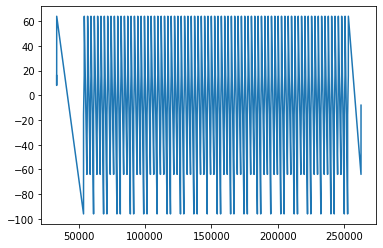

In [18]:
der = filtered_df[filtered_df['derivative'] != 0]

# Plot the filtered series
der['derivative'].plot()
plt.show()

In [18]:
# find the index of the last occurrence of 120
index = filtered_data.loc[filtered_data['EVENT1'] == 120].index[-1]

# remove all rows after the last 120
filtered_data = filtered_data.iloc[:index+1]

# display the resulting dataframe
print(filtered_data)

              CH1        CH2        CH3        CH4        CH5        CH6  \
0      -20.487592 -20.172398 -21.340469 -12.941483 -15.954364 -13.775819   
33402   -4.431143 -12.587077  -2.421950  -0.929971   1.367783   2.243261   
33405   -6.913507 -10.416575  -1.037787   0.039897   2.536245   2.568501   
33408   -9.577475  -8.489017  -0.974141   0.936679   2.592322   2.434926   
33435   -5.387843 -11.998899  -6.178753   0.490758   2.262946   1.390492   
...           ...        ...        ...        ...        ...        ...   
253239 -10.943711  -3.430220  15.810729  35.717697   5.763167  13.130855   
262762  20.627053   7.814514  16.207865  16.547832  17.705208  15.503204   
262777   6.605695   3.061404  14.615416  13.356894  13.194365  14.161063   
262780  10.669787   5.664929  16.010187  15.690737  13.754608  16.294665   
262781  13.472496   8.083515  16.840011  17.490380  14.679882  17.902603   

              CH7        CH8        CH9       CH10  ...       CH22       CH23  \
0     

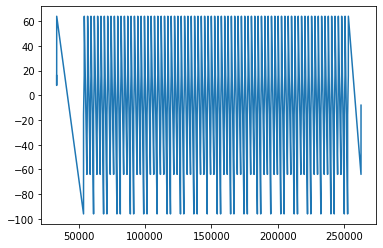

In [20]:
plt.plot(filtered_data['derivative'])
plt.show()

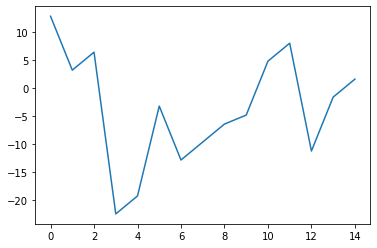

In [15]:
import matplotlib.pyplot as plt

data = [12.8, 3.2, 6.4, -22.4, -19.2, -3.2, -12.8, -9.6, -6.4, -4.8, 4.8, 8.0, -11.2, -1.6, 1.6]
plt.plot(data)
plt.show()

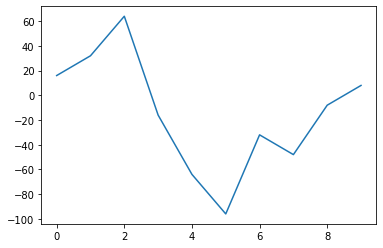

In [16]:
data = [16.0,32.0,64.0,-16.0,-64.0,-96.0,-32.0,-48.0,-8.0,8.0]
plt.plot(data)
plt.show()

Epoching: Dividing the continuous data into smaller segments, called epochs, that correspond to specific events or conditions. For example, the data can be divided into epochs corresponding to different tasks or stimuli.

Time-frequency analysis: Time-frequency analysis techniques, such as the Fourier transform or the wavelet transform are used to analyze the frequency content of EEG data over time. These techniques can be used to identify patterns or changes in the spectral power of the EEG signal that are related to specific events or conditions.

Feature extraction: Extract relevant features or characteristics of the signal that can be used to classify or analyze the data. For example, features such as the mean, standard deviation, or power spectral density of the signal within specific frequency bands or epochs can be extracted.

Classification: Once relevant features have been extracted ML techniques to classify the data ca be applied. For example, using supervised learning algorithms such as support vector machines or random forests to classify the data into different classes or groups.

Event-related potentials (ERPs) are changes in the electrical activity of the brain that are time-locked to specific events or stimuli. They are often used to study cognitive processes such as attention, perception, and memory, and they can be measured using EEG.

To detect ERPs in EEG data:

Preprocess the data: Preprocessing the data involves steps such as filtering, epoching, and removing artifacts. This is important to ensure that the data is clean and ready for analysis.

Average the data: To detect ERPs, you typically need to average the EEG data across multiple trials or repetitions of the same event or stimulus. This helps to reduce the noise in the data and enhance the signal-to-noise ratio.

Identify the ERP components: ERPs are often characterized by specific components or waves that are associated with different cognitive processes or brain regions. These components can be identified by their shape, amplitude, and latency.

Analyze the data: Once the ERP components are idetnfieid, data can be analyzed to answer specific research questions. For example -compare the amplitudes or latencies of the ERP components between different conditions or groups, or use machine learning techniques to classify the data based on the ERP components.

In [10]:
import csv

with open('data/data.txt', 'r') as txt_file:
    reader = csv.reader(txt_file, delimiter='\t')
    with open('data/data.tsv', 'w') as tsv_file:
        writer = csv.writer(tsv_file, delimiter='\t')
        for row in reader:
            writer.writerow(row)

In [51]:
import pandas as pd
import numpy as np
import mne

# file path to your EEG data
file_path = 'data/0014.txt'

# read in the data using pandas
data = pd.read_csv(file_path, delimiter='\t')

# extract the data as a numpy array
eeg_data = data.values[:, :-1].T

# create an MNE info object
n_channels = eeg_data.shape[0]
ch_names = ['CH{}'.format(i) for i in range(1, n_channels+1)]
#ch_types = ['eeg'] * n_channels
ch_types = ['eeg'] * (len(ch_names) - 1) + ['stim']
sfreq = 1000
info = mne.create_info(ch_names, sfreq, ch_types)

# create an MNE RawArray object
raw = mne.io.RawArray(eeg_data, info)

# print information about the data
print(raw.info)

Creating RawArray with float64 data, n_channels=28, n_times=275559
    Range : 0 ... 275558 =      0.000 ...   275.558 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: CH1, CH2, CH3, CH4, CH5, CH6, CH7, CH8, CH9, CH10, CH11, CH12, ...
 chs: 27 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 28
 projs: []
 sfreq: 1000.0 Hz
>


tests

In [37]:
import numpy as np
import mne

ch_names = ['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2','F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'FZ', 'CZ', 'PZ', 'OZ','FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'EVENT1']
# set channel types
ch_types = ['eeg'] * (len(ch_names) - 1) + ['stim']
sfreq = 1000

# create an MNE Info object to store the channel names, types, and sampling frequency
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# create an MNE RawArray object with all channels initialized to zero
raw = mne.io.RawArray(data=np.zeros((len(ch_names), 1)), info=info)

# print channel information
print(raw.info)

Creating RawArray with float64 data, n_channels=29, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FP2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 28 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 29
 projs: []
 sfreq: 1000.0 Hz
>


In [38]:
# file path to your EEG data
file_path = 'data/0014.txt'

# read in the data using pandas
data = pd.read_csv(file_path, delimiter='\t')

# extract the data as a numpy array
eeg_data = data.values[:, :-1].T
raw._data = eeg_data

In [40]:
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FP2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 28 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 29
 projs: []
 sfreq: 1000.0 Hz
>


In [ ]:
import numpy as np
import pandas as pd
import mne

# file path to your EEG data
file_path = 'data/0014.txt'

# read in the data using pandas
data = pd.read_csv(file_path, delimiter='\t')

# extract the data as a numpy array
eeg_data = data.values[:, :-1].T

# # create channel names
# ch_names = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2',
#             'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'FC1',
#             'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'STI 014']

# # create channel types
# ch_types = ['eeg'] * 28 + ['stim']

# create sampling frequency
sfreq = 1000

# define the channel names and types
ch_names = list(data.columns[:-1])
ch_types = ['eeg'] * (len(ch_names) - 1) + ['stim']

# create an MNE Info object to store the channel names, types, and sampling frequency
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# create an MNE RawArray object with all channels initialized to zero
raw = mne.io.RawArray(data=np.zeros((len(ch_names), 1)), info=info)

# # create an MNE Info object to store the channel names, types, and sampling frequency
# info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# # create an MNE RawArray object with all channels initialized to zero
# raw = mne.io.RawArray(data=np.zeros((len(ch_names), 1)), info=info)

# add the data to the MNE RawArray object
raw._data = eeg_data

# plot the data
#raw.plot(n_channels=len(ch_names), scalings='auto', show=True)

In [34]:
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: CH1, CH2, CH3, CH4, CH5, CH6, CH7, CH8, CH9, CH10, CH11, CH12, ...
 chs: 27 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 28
 projs: []
 sfreq: 1000.0 Hz
>


Using matplotlib as 2D backend.


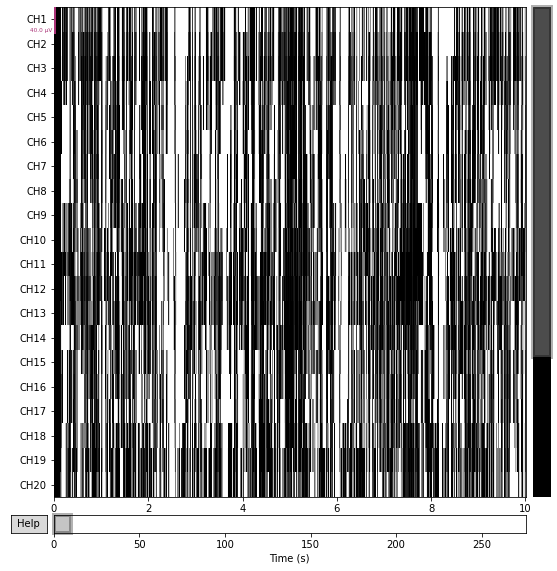

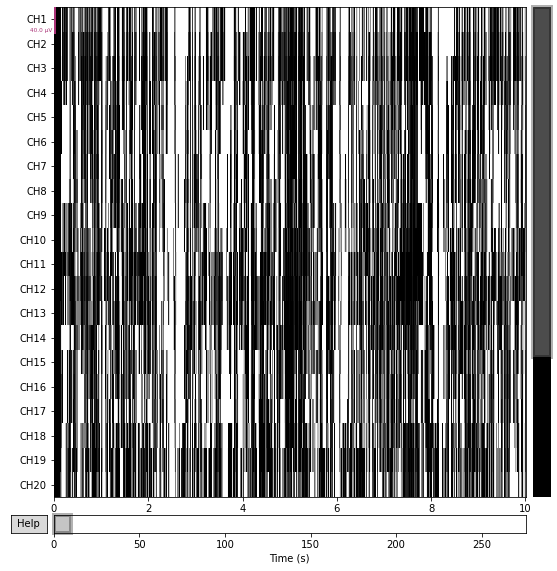

In [20]:
raw.plot()

In [5]:
raw.filter(l_freq=1, h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.3s finished


<RawArray | 28 x 275559 (275.6 s), ~58.9 MB, data loaded>

In [5]:
raw.filter(l_freq=None, h_freq=40)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.9s finished


<RawArray | 28 x 275559 (275.6 s), ~58.9 MB, data loaded>

Effective window size : 0.256 (s)


C:\Users\metodi\AppData\Local\Temp\ipykernel_22140\2689867795.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()
d:\Dev\Python\Anaconda\envs\python3.10\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


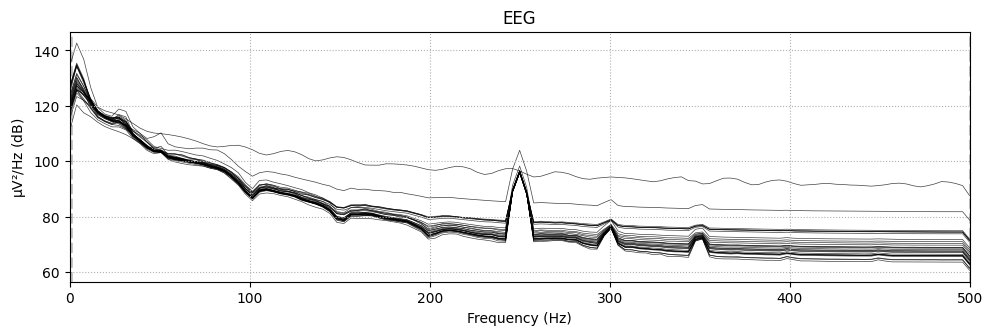

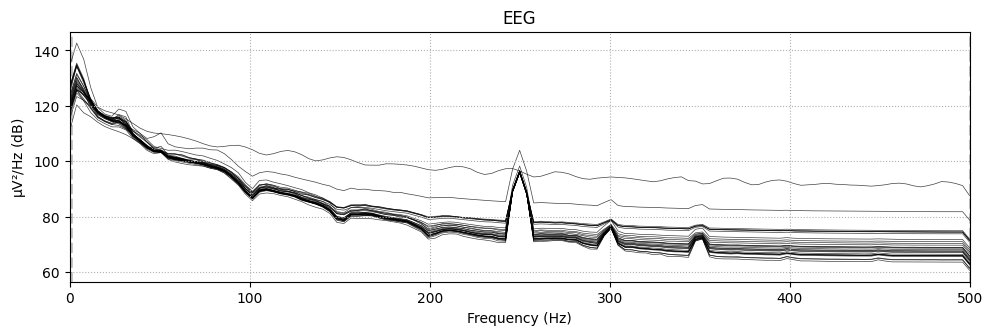

In [6]:
#raw.plot_psd()
raw.compute_psd().plot()

In [19]:
raw.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

In [7]:
raw.__dict__

{'_data': array([[ 0.00000000e+00,  6.64680913e-01,  7.82935046e+00, ...,
          3.99408423e-01, -8.52917973e-02, -1.44328993e-15],
        [ 3.55271368e-15,  2.37972616e-01,  3.23594230e+00, ...,
          2.80795206e-01, -1.49597715e-01,  7.54951657e-15],
        [ 7.10542736e-15, -2.69259012e-01,  2.19147582e+00, ...,
          5.49860702e-01,  1.94935094e-01,  5.44009282e-15],
        ...,
        [-7.10542736e-15, -2.82943903e-01,  2.23410850e+00, ...,
          1.17915264e+00,  7.44580120e-01,  2.66453526e-15],
        [-3.55271368e-15, -2.29003677e-01,  2.33198736e+00, ...,
          3.51447489e-01,  9.07276767e-02, -5.55111512e-17],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]),
 'preload': True,
 '_last_samps': array([275558]),
 '_first_samps': array([0]),
 'info': <Info | 7 non-empty values
  bads: []
  ch_names: CH1, CH2, CH3, CH4, CH5, CH6, CH7, CH8, CH9, CH10, CH11, CH12, ...
  chs: 28 EEG


In [13]:
df.value_counts('EVENT1')

EVENT1
120    184425
0       46180
8       41533
56       2696
24        722
16          3
dtype: int64

Before running this function, we need to create the epochs and events objects (done above)

In [22]:
stim_data = df.iloc[:, -1]
stim_data = np.zeros((1, len(raw.times)))
info = mne.create_info(['STI'], raw.info['sfreq'], ['stim'])
stim_raw = mne.io.RawArray(stim_data, info)
raw.add_channels([stim_raw], force_update_info=True)

Creating RawArray with float64 data, n_channels=1, n_times=275559
    Range : 0 ... 275558 =      0.000 ...   275.558 secs
Ready.


<RawArray | 29 x 275559 (275.6 s), ~61.0 MB, data loaded>

In [28]:
# Define the duration of each epoch (in seconds)
epoch_duration = 2.0
sampling_rate = 1000

# Identify the indices where the stimuli occurred (where EVENT1 == 120)
stimulus_indices = np.where(df['EVENT1'] == 120)[0]

# Define the start and end times of each epoch relative to the stimulus onset
epoch_start_times = stimulus_indices
epoch_end_times = stimulus_indices + int(epoch_duration * sampling_rate)

# Create a list of epoch data, where each epoch is a slice of the EEG data
epochs = [df.iloc[start_time:end_time] for start_time, end_time in zip(epoch_start_times, epoch_end_times)]
epochs

[          CH1     CH2    CH3    CH4    CH5    CH6    CH7    CH8    CH9   CH10  \
 33435   -7.26  -12.41  -8.88  -1.34  -0.33  -0.24   1.77  -2.71   1.25  -0.98   
 33436   -9.40  -12.33  -8.93  -1.47  -0.38  -0.28   2.00  -2.42   1.93  -0.34   
 33437  -11.19  -12.72  -8.99  -1.65  -0.31  -0.37   2.29  -2.09   2.61   0.39   
 33438  -12.88  -14.06  -9.36  -2.20  -0.47  -0.81   2.28  -2.06   3.03   0.90   
 33439  -14.12  -14.54  -9.52  -2.60  -0.40  -1.03   2.50  -1.82   3.67   1.68   
 ...       ...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
 35430 -243.57 -222.43 -75.48 -86.53 -35.56 -29.43 -22.42 -17.98 -16.46 -14.49   
 35431 -246.24 -223.74 -75.66 -87.05 -35.97 -29.86 -22.73 -18.30 -16.89 -14.87   
 35432 -248.00 -223.42 -74.91 -86.85 -35.78 -29.66 -22.46 -18.03 -16.70 -14.60   
 35433 -248.59 -221.96 -73.37 -86.04 -35.06 -28.94 -21.67 -17.24 -15.94 -13.81   
 35434 -248.63 -221.20 -71.81 -85.32 -34.49 -28.38 -21.13 -16.68 -15.33 -13.23   
 
        ...  C

In [7]:
filtered_df.value_counts("EVENT1")

EVENT1
120    184425
0       46180
8       41533
56       2696
24        722
16          3
dtype: int64

In [4]:
num_samples = df.shape[0]
sampling_rate = 1000 # samples per second
duration = num_samples / sampling_rate
print(duration)

275.559


In [5]:
num_samples = df.shape[0]
total_duration = 275.559 # seconds (5 minutes)
sampling_rate = num_samples / total_duration
print(sampling_rate)

999.9999999999999


Try to Epoch the data

The event channel is extracted from the data using the iloc indexer, and the epoching process is performed by iterating through the events array and extracting the data from the filtered_df DataFrame for each event. The resulting epochs are stored in a list called epochs. Individual epochs can be accessed using a loop.

In [25]:
event_channel = df.iloc[:, -1]
event_channel

0         0
1         0
2         0
3         0
4         0
         ..
275554    0
275555    0
275556    0
275557    0
275558    0
Name: EVENT1, Length: 275559, dtype: int64

In [11]:
event_channel.info()

<class 'pandas.core.series.Series'>
RangeIndex: 275559 entries, 0 to 275558
Series name: window
Non-Null Count   Dtype  
--------------   -----  
275549 non-null  float64
dtypes: float64(1)
memory usage: 2.1 MB


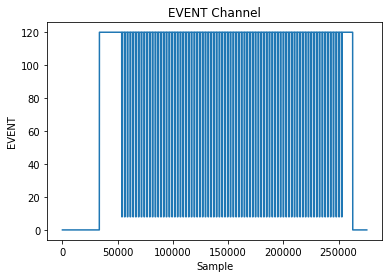

In [26]:
import matplotlib.pyplot as plt

event_data = df['EVENT1']
plt.plot(event_data)
plt.xlabel('Sample')
plt.ylabel('EVENT')
plt.title('EVENT Channel')
plt.show()

In [7]:
epoch_length = 1000  # number of samples based on the frequency
epochs = []
for event_value in filtered_df["EVENT1"].unique():  # loop over unique values in EVENT1
    if event_value == 0:
        continue  # skip value 0 as it's not a stimulus event
    event_indices = filtered_df[filtered_df["EVENT1"] == event_value].index  # get indices of events with this value
    for i, event_index in enumerate(event_indices):
        if i == len(event_indices) - 1:
            break  # skip last event if it doesn't have enough samples for epoch
        epoch_start = event_index
        epoch_end = epoch_start + epoch_length
        epoch = filtered_df.iloc[epoch_start:epoch_end, :-1]  # exclude EVENT1 column
        epochs.append(epoch)

In [ ]:
if len(epochs) > 1:
    fig = px.line(epochs, title="Epochs")
    fig.update_layout(
        xaxis_title="Sample",
        yaxis_title="Amplitude",
        legend_title_text="Epoch",
        xaxis=dict(gridcolor='rgba(0,0,0,0)'),  # remove gridlines
        yaxis=dict(gridcolor='rgba(0,0,0,0)')
    )
else:
    fig = px.line(epochs[0], title="Epoch 1")
    fig.update_layout(
        xaxis_title="Sample",
        yaxis_title="Amplitude",
        xaxis=dict(gridcolor='rgba(0,0,0,0)'),  # remove gridlines
        yaxis=dict(gridcolor='rgba(0,0,0,0)')
    )
fig.update_layout(width=1800, height=900)  # make plot bigger
fig.show()

# Tests

In [19]:
event_channel = df.iloc[:, -1]

epoch_length = 1000  # number of samples based on the frequency
epochs = []
event1_values = df["EVENT1"].diff().values  # get the derivative of the EVENT1 column

for i, event_value in enumerate(df["EVENT1"].values):
    if event_value == 0:
        continue  # skip value 0 as it's not a stimulus event
    if event1_values[i] != 0:  # if the derivative is not 0, it means a new epoch is starting
        epoch_start = i
        epoch_end = epoch_start + epoch_length
        epoch = df.iloc[epoch_start:epoch_end, :-1]  # exclude EVENT1 column
        epochs.append(epoch)

In [3]:
event_channel = df.iloc[:, -1]

epoch_length = 1000  # number of samples based on the frequency
window_size = 100  # number of samples for the sliding window
stride = 50  # number of samples for the stride
epochs = []
event1_values = df["EVENT1"].diff().values  # get the derivative of the EVENT1 column

for i, event_value in enumerate(df["EVENT1"].values):
    if event_value == 0:
        continue  # skip value 0 as it's not a stimulus event
    if event1_values[i] != 0:  # if the derivative is not 0, it means a new epoch is starting
        epoch_start = i
        epoch_end = epoch_start + epoch_length
        epoch = df.iloc[epoch_start:epoch_end, :-1]  # exclude EVENT1 column
        for j in range(0, epoch_length - window_size + 1, stride):
            window_start = epoch_start + j
            window_end = window_start + window_size
            window = epoch.iloc[j:j+window_size, :]
            epochs.append(window)


In [4]:
epochs

[         CH1    CH2   CH3   CH4   CH5   CH6   CH7   CH8    CH9   CH10  ...  \
 33402  -2.28 -11.60 -2.85  0.12  1.96  2.35  0.85  2.90  -4.30  -4.61  ...   
 33403  -4.04 -11.88 -3.28  0.17  1.78  2.12  0.85  2.67  -4.08  -4.66  ...   
 33404  -5.65 -10.78 -2.88  0.66  2.15  2.40  1.51  3.05  -3.18  -3.97  ...   
 33405  -7.60  -9.74 -2.37  1.01  2.43  2.59  2.14  3.35  -2.27  -3.20  ...   
 33406 -10.06  -9.66 -2.30  0.90  2.21  2.31  2.25  3.11  -1.82  -2.86  ...   
 ...      ...    ...   ...   ...   ...   ...   ...   ...    ...    ...  ...   
 33497  -9.34 -12.46 -5.01 -3.66 -2.00  3.07  1.96  4.96  10.61  12.40  ...   
 33498 -11.07 -13.43 -5.86 -4.20 -2.82  2.41  1.15  4.48   9.48  11.73  ...   
 33499 -12.36 -13.81 -6.50 -4.53 -3.50  1.88  0.45  4.12   8.41  11.15  ...   
 33500 -12.56 -12.88 -6.65 -4.30 -3.81  1.80  0.21  4.21   7.73  10.95  ...   
 33501 -12.26 -12.46 -6.96 -4.16 -4.35  1.54 -0.19  4.12   6.88  10.53  ...   
 
        CH19  CH20  CH21  CH22  CH23  CH24  CH25  

In [6]:
import pandas as pd
import plotly.express as px

# Compute event channel
event_channel = df.iloc[:, -1]
derivative = event_channel.diff()

# Compute events
events = []
for i, event in enumerate(derivative):
    if event > 0 and derivative[i-1] == 0:
        events.append([i, event, 0])

# Compute epochs
window_size = 100
epochs = []
for event in events:
    start = event[0]
    end = start + window_size
    epoch = df.iloc[start:end, :-1] # exclude event channel
    epochs.append(epoch)

In [14]:
epochs

[         CH1    CH2   CH3   CH4   CH5   CH6   CH7   CH8    CH9   CH10  ...  \
 33402  -2.28 -11.60 -2.85  0.12  1.96  2.35  0.85  2.90  -4.30  -4.61  ...   
 33403  -4.04 -11.88 -3.28  0.17  1.78  2.12  0.85  2.67  -4.08  -4.66  ...   
 33404  -5.65 -10.78 -2.88  0.66  2.15  2.40  1.51  3.05  -3.18  -3.97  ...   
 33405  -7.60  -9.74 -2.37  1.01  2.43  2.59  2.14  3.35  -2.27  -3.20  ...   
 33406 -10.06  -9.66 -2.30  0.90  2.21  2.31  2.25  3.11  -1.82  -2.86  ...   
 ...      ...    ...   ...   ...   ...   ...   ...   ...    ...    ...  ...   
 33497  -9.34 -12.46 -5.01 -3.66 -2.00  3.07  1.96  4.96  10.61  12.40  ...   
 33498 -11.07 -13.43 -5.86 -4.20 -2.82  2.41  1.15  4.48   9.48  11.73  ...   
 33499 -12.36 -13.81 -6.50 -4.53 -3.50  1.88  0.45  4.12   8.41  11.15  ...   
 33500 -12.56 -12.88 -6.65 -4.30 -3.81  1.80  0.21  4.21   7.73  10.95  ...   
 33501 -12.26 -12.46 -6.96 -4.16 -4.35  1.54 -0.19  4.12   6.88  10.53  ...   
 
        CH19  CH20  CH21  CH22  CH23  CH24  CH25  

old way of Epoching the data

In [27]:
events = []
for i, event in enumerate(event_channel):
    if event > 0 and event_channel[i-1] == 0:
        events.append([i, event, 0])
epoch_length = 1000 # number of samples based on the frequency
epochs = []
for event in events:
    start = event[1]
    end = event[2] + epoch_length
    epoch = df.iloc[start:end, :-1] # exclude event channel
    epochs.append(epoch)
for epoch in epochs:
    print(epoch)
    len(epoch)

       CH1     CH2    CH3    CH4    CH5    CH6    CH7    CH8    CH9   CH10  \
16  -11.29    0.22 -12.99  -5.02  -6.35  -3.79  -4.92  -4.71  -6.75  -8.19   
17  -30.75  -47.06 -32.51 -25.37 -24.98 -23.34 -26.66 -25.95 -26.58 -27.97   
18  -48.56  -91.76 -50.85 -44.36 -42.34 -41.70 -46.96 -45.78 -45.10 -46.44   
19  -61.82 -126.76 -65.35 -59.05 -55.74 -55.97 -62.75 -61.11 -59.41 -60.74   
20  -68.60 -146.69 -73.72 -67.21 -63.09 -63.96 -71.61 -69.59 -67.33 -68.67   
..     ...     ...    ...    ...    ...    ...    ...    ...    ...    ...   
995   5.27    7.75   6.32  10.50  12.19   9.00  12.53  10.33  12.39  11.18   
996   6.17    9.78   7.65  11.99  13.03   9.86  13.49  11.10  13.18  11.69   
997   7.30   12.26   9.02  13.55  13.94  10.86  14.52  11.94  14.01  12.21   
998   7.86   13.32   9.54  14.29  14.10  11.16  14.79  12.07  14.05  12.06   
999   7.63   12.61   8.99  13.93  13.28  10.52  14.03  11.23  13.07  11.05   

     ...   CH19   CH20   CH21   CH22   CH23   CH24   CH25   CH2

In [19]:
if len(epochs) > 4:
    fig = px.line(epochs, title="Epochs")
    fig.update_layout(
        xaxis_title="Sample",
        yaxis_title="Amplitude",
        legend_title_text="Epoch",
        xaxis=dict(gridcolor='rgba(0,0,0,0)'),  # remove gridlines
        yaxis=dict(gridcolor='rgba(0,0,0,0)')
    )
else:
    fig = px.line(epochs[0], title="Epoch 1")
    fig.update_layout(
        xaxis_title="Sample",
        yaxis_title="Amplitude",
        xaxis=dict(gridcolor='rgba(0,0,0,0)'),  # remove gridlines
        yaxis=dict(gridcolor='rgba(0,0,0,0)')
    )
fig.update_layout(width=1800, height=900)  # make plot bigger
fig.show()

# Save the plot as an HTML file
#pio.write_html(fig, file='EpochsPlot.html', auto_open=True)

In [20]:
# Create a boolean mask to identify events between stimuli 120 and stimuli 0
mask = (df['EVENT1'] > 0) & (df['EVENT1'] <= 120)
# Add a new column to the DataFrame to mark the events between stimuli 120 and stimuli 0
df['events_between_120_and_0'] = mask.astype(int)
df.value_counts('events_between_120_and_0')

events_between_120_and_0
1    229379
0     46180
dtype: int64

#----

Attempt FFT

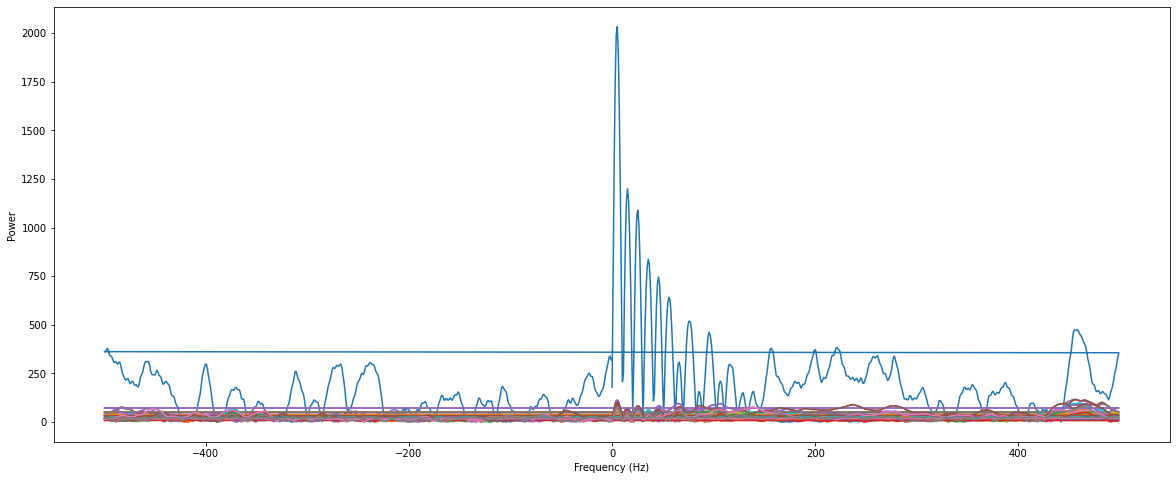

In [16]:
# Compute the Fourier transform of the epoch
fourier_transform = np.fft.fft(epoch)

# Get the frequencies of the transform
frequencies = np.fft.fftfreq(epoch.shape[0], d=1/sampling_rate)

# Plot the power spectrum of the epoch
plt.figure(figsize=(20, 8))
plt.plot(frequencies, np.abs(fourier_transform))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.show()

In [17]:
# Compute the Fourier transform of the epoch
fourier_transform = np.fft.fft(epoch)
# Get the frequencies of the transform
frequencies = np.fft.fftfreq(epoch.shape[0], d=1/sampling_rate)
# Create a trace with the power spectrum data
trace = go.Scatter(x=frequencies, y=np.abs(fourier_transform))
# Create the layout for the plot
layout = go.Layout(title="Power Spectrum", xaxis_title="Frequency (Hz)", yaxis_title="Power")
# Create the figure and plot the power spectrum
fig = go.Figure(data=[trace], layout=layout)
fig.show()
# Save the plot as an HTML file
pio.write_html(fig, file='PowerSpectrumPlot.html', auto_open=True)

Attemp Time-frequency Analysis

Time-frequency analysis of EEG data involves decomposing the signal into different frequency bands over time. This can be useful for studying how brain activity changes over time, and can be helpful in identifying specific patterns or changes in brain activity.

There are several methods for performing time-frequency analysis in Python, including:

Short-time Fourier transform (STFT): This method involves dividing the signal into small time intervals (called "windows") and performing a Fourier transform on each window to obtain the frequency content.

Wavelet transform: This method decomposes the signal into frequency bands using wavelets, which are specialized functions that are well-suited for analyzing time-varying signals.

Autoregressive model: This method involves fitting an autoregressive model to the data and using the model parameters to estimate the time-varying spectral content of the signal.

To perform time-frequency analysis on your EEG data in Python, first load the data into a Pandas dataframe.

To perform STFT analysis, scipy.signal.stft function can be used. 
To perform wavelet analysis, use the pywt.cwt function from the PyWavelets library. 
To fit an autoregressive model, use the statsmodels.tsa.ar_model.AR function from the statsmodels library.

EEG data often contains artifacts, such as eye blinks or muscle movements, that can affect the results of the time-frequency analysis. To remove these artifacts, it is usually necessary to pre-process the data using techniques such as artifact rejection or independent component analysis.

#

The Shannon entropy of a signal is a measure of the randomness or uncertainty of the signal. A signal with high Shannon entropy is considered more random or unpredictable, while a signal with low Shannon entropy is considered more predictable.

Shannon entropy can be used to identify patterns or trends in the data that may not be immediately visible. For example, if the Shannon entropy of a particular EEG channel is consistently high over time, it may indicate that there is a high level of variability or unpredictability in the data. On the other hand, if the Shannon entropy is consistently low, it may indicate that there are clear patterns or trends in the data.

Shannon entropy can be used on each EEG channel to identify patterns or trends in the data and understand how the brain is responding to different stimuli or tasks. hannon entropy can also be used to compare the data from different channels or subjects and see how they differ in terms of variability and predictability.

Parallel Shannon Entropy calculation:

In [2]:
import numpy as np
from pyentrp import entropy as ent
from joblib import Parallel, delayed

# Load the data into a NumPy array
data = np.loadtxt("data/0014.txt", skiprows=1, usecols=np.arange(0, 28))

# Define a function to calculate the Shannon entropy of a single channel
def calculate_shannon_entropy(channel):
    return ent.shannon_entropy(channel)

# Use Parallel from the joblib library to calculate the Shannon entropy in parallel
shannon_entropy = Parallel(n_jobs=22, verbose=1)(delayed(calculate_shannon_entropy)(channel) for channel in data.T)

[Parallel(n_jobs=22)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done  14 out of  28 | elapsed:  3.6min remaining:  3.6min
[Parallel(n_jobs=22)]: Done  28 out of  28 | elapsed:  6.4min finished


In [6]:
# Convert the entropy values to a Pandas dataframe
df = pd.DataFrame(shannon_entropy, index=np.arange(1, 29))

# Create a line plot with the Shannon entropy column as the color
fig = px.line(df, x=df.index, y=0)

# Set the x-axis and y-axis labels
fig.update_layout(xaxis_title='Channel', yaxis_title='Shannon entropy')

# Hide the gridlines
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show the plot
fig.show()

# Save the plot as an HTML file
pio.write_html(fig, file='EntropyPlot.html', auto_open=True)

Average epochs per given condition - what event is coded how

In [11]:
# Load the EEG data into a Pandas dataframe
df = pd.read_csv("data/0014.txt", sep='\t', index_col=False, header=0)

# Create a new column to indicate whether an event occurred at each time point
df['EVENT_OCCURRED'] = df['EVENT1'].apply(lambda x: 1 if x > 0 else 0)
df

CH1    CH2    CH3    CH4    CH5    CH6    CH7    CH8    CH9   CH10  \
0      -22.10 -21.76 -23.02 -13.96 -17.21 -14.86 -17.11 -16.89 -17.81 -19.57   
1      -21.01 -21.05 -22.75 -14.21 -17.33 -15.03 -16.83 -16.86 -17.48 -19.37   
2      -17.29 -13.84 -19.72 -11.73 -14.80 -12.51 -13.56 -13.96 -14.46 -16.48   
3       -9.22   4.01 -12.39  -4.71  -7.95  -5.53  -5.41  -6.29  -6.96  -9.12   
4        3.10  32.33  -0.78   7.03   3.25   5.99   7.63   6.24   5.05   2.71   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
275554  11.50   3.44   3.57   5.68   7.01   1.73   5.27   2.80  10.65   8.15   
275555  12.13   5.05   4.17   7.21   7.81   3.41   6.00   3.91  11.08   8.87   
275556  12.08   5.21   4.03   7.71   7.80   4.19   5.94   4.28  10.76   8.89   
275557  11.85   4.72   3.61   7.38   7.41   4.25   5.48   4.17  10.15   8.60   
275558  12.20   4.80   3.77   7.21   7.45   4.41   5.44   4.39  10.02   8.73   

        ...   CH21   CH22   CH23   CH24   CH25   CH26   CH27   CH28  EVENT1  \
0       ... -20.81 -16.96 -16.27 -15.64 -14.51 -20.63 -10.40 -17.09       0   
1       ... -20.65 -17.07 -16.14 -15.61 -14.61 -20.23 -10.64 -17.28       0   
2       ... -17.71 -14.54 -12.47 -12.81 -12.01 -17.20  -8.08 -14.68       0   
3       ... -10.19  -7.67  -3.01  -5.42  -4.92  -9.87  -0.88  -7.51       0   
4       ...   1.82   3.66  12.36   6.57   6.77   1.71  11.12   4.32       0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
275554  ...   9.85   4.61  -5.01   4.37   0.73   9.98   1.87   1.28       0   
275555  ...  10.22   5.74  -2.99   5.52   2.18  10.13   4.00   2.38       0   
275556  ...   9.90   6.06  -2.00   5.85   2.79   9.48   4.95   2.69       0   
275557  ...   9.33   5.95  -1.70   5.75   2.87   8.55   4.52   2.43       0   
275558  ...   9.15   6.25  -1.09   6.03   3.23   8.20   3.78   2.34       0   

        EVENT_OCCURRED  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
275554               0  
275555               0  
275556               0  
275557               0  
275558               0  

[275559 rows x 30 columns]

In [12]:
df.value_counts('EVENT1')

EVENT1
120    184425
0       46180
8       41533
56       2696
24        722
16          3
dtype: int64

In [13]:
# Load the stimuli data into a Pandas dataframe
stimuli_df = pd.read_excel("data/FacesERP_05.xls")
stimuli_df

Block      Condition  Exp  Exp.Sample    Stimuli
0       1  ScrambledFace   79           1   sm19.bmp
1       2    UprightFace   23           2  bwm03.bmp
2       3  ScrambledFace   65           3   sm05.bmp
3       4    UprightFace   40           4  bwm20.bmp
4       5   InvertedFace    5           5  bwi05.bmp
..    ...            ...  ...         ...        ...
75     76   InvertedFace   12          76  bwi12.bmp
76     77   InvertedFace   13          77  bwi13.bmp
77     78   InvertedFace    6          78  bwi06.bmp
78     79         Object   55          79    o15.bmp
79     80         Object   60          80    o20.bmp

[80 rows x 5 columns]

In [28]:
# Load the EEG data into a Pandas dataframe
df = pd.read_csv("data/0014.txt", sep='\t', index_col=False, header=0)

# Create separate columns for each event type
df['EVENT120_OCCURRED'] = df['EVENT1'].apply(lambda x: 1 if x == 120 else 0)
df['EVENT0_OCCURRED'] = df['EVENT1'].apply(lambda x: 1 if x == 0 else 0)
df['EVENT8_OCCURRED'] = df['EVENT1'].apply(lambda x: 1 if x == 8 else 0)
df['EVENT56_OCCURRED'] = df['EVENT1'].apply(lambda x: 1 if x == 56 else 0)
df['EVENT24_OCCURRED'] = df['EVENT1'].apply(lambda x: 1 if x == 24 else 0)
df['EVENT16_OCCURRED'] = df['EVENT1'].apply(lambda x: 1 if x == 16 else 0)
df

CH1    CH2    CH3    CH4    CH5    CH6    CH7    CH8    CH9   CH10  \
0      -22.10 -21.76 -23.02 -13.96 -17.21 -14.86 -17.11 -16.89 -17.81 -19.57   
1      -21.01 -21.05 -22.75 -14.21 -17.33 -15.03 -16.83 -16.86 -17.48 -19.37   
2      -17.29 -13.84 -19.72 -11.73 -14.80 -12.51 -13.56 -13.96 -14.46 -16.48   
3       -9.22   4.01 -12.39  -4.71  -7.95  -5.53  -5.41  -6.29  -6.96  -9.12   
4        3.10  32.33  -0.78   7.03   3.25   5.99   7.63   6.24   5.05   2.71   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
275554  11.50   3.44   3.57   5.68   7.01   1.73   5.27   2.80  10.65   8.15   
275555  12.13   5.05   4.17   7.21   7.81   3.41   6.00   3.91  11.08   8.87   
275556  12.08   5.21   4.03   7.71   7.80   4.19   5.94   4.28  10.76   8.89   
275557  11.85   4.72   3.61   7.38   7.41   4.25   5.48   4.17  10.15   8.60   
275558  12.20   4.80   3.77   7.21   7.45   4.41   5.44   4.39  10.02   8.73   

        ...   CH26   CH27   CH28  EVENT1  EVENT120_OCCURRED  EVENT0_OCCURRED  \
0       ... -20.63 -10.40 -17.09       0                  0                1   
1       ... -20.23 -10.64 -17.28       0                  0                1   
2       ... -17.20  -8.08 -14.68       0                  0                1   
3       ...  -9.87  -0.88  -7.51       0                  0                1   
4       ...   1.71  11.12   4.32       0                  0                1   
...     ...    ...    ...    ...     ...                ...              ...   
275554  ...   9.98   1.87   1.28       0                  0                1   
275555  ...  10.13   4.00   2.38       0                  0                1   
275556  ...   9.48   4.95   2.69       0                  0                1   
275557  ...   8.55   4.52   2.43       0                  0                1   
275558  ...   8.20   3.78   2.34       0                  0                1   

        EVENT8_OCCURRED  EVENT56_OCCURRED  EVENT24_OCCURRED  EVENT16_OCCURRED  
0                     0                 0                 0                 0  
1                     0                 0                 0                 0  
2                     0                 0                 0                 0  
3                     0                 0                 0                 0  
4                     0                 0                 0                 0  
...                 ...               ...               ...               ...  
275554                0                 0                 0                 0  
275555                0                 0                 0                 0  
275556                0                 0                 0                 0  
275557                0                 0                 0                 0  
275558                0                 0                 0                 0  

[275559 rows x 35 columns]

Try to create a timestamp column based on the EEG frequency 

In [32]:
# Load the EEG data into a Pandas dataframe
df = pd.read_csv("data/0014.txt", sep='\t', index_col=False, header=0)

# Set the frequency of the EEG signal
frequency = 1000  #Hz

# Calculate the total number of samples in the EEG data
total_samples = df.shape[0]

# Calculate the duration of the recording in seconds
recording_duration = total_samples / frequency

# Read the start time of the experiment from the raw EEG file
experiment_start_time = '07-18-2022 14:03:07'

# Convert the start time to a datetime object
experiment_start_time = pd.to_datetime(experiment_start_time, format='%m-%d-%Y %H:%M:%S')

# Generate a series of timestamps spaced apart by the sample duration and starting from the experiment start time
timestamps = pd.date_range(start=experiment_start_time, freq=f'{1/frequency}S', periods=total_samples)

# Add the timestamps to the EEG data dataframe as a new column
df['TIMESTAMP'] = timestamps
df

CH1    CH2    CH3    CH4    CH5    CH6    CH7    CH8    CH9   CH10  \
0      -22.10 -21.76 -23.02 -13.96 -17.21 -14.86 -17.11 -16.89 -17.81 -19.57   
1      -21.01 -21.05 -22.75 -14.21 -17.33 -15.03 -16.83 -16.86 -17.48 -19.37   
2      -17.29 -13.84 -19.72 -11.73 -14.80 -12.51 -13.56 -13.96 -14.46 -16.48   
3       -9.22   4.01 -12.39  -4.71  -7.95  -5.53  -5.41  -6.29  -6.96  -9.12   
4        3.10  32.33  -0.78   7.03   3.25   5.99   7.63   6.24   5.05   2.71   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
275554  11.50   3.44   3.57   5.68   7.01   1.73   5.27   2.80  10.65   8.15   
275555  12.13   5.05   4.17   7.21   7.81   3.41   6.00   3.91  11.08   8.87   
275556  12.08   5.21   4.03   7.71   7.80   4.19   5.94   4.28  10.76   8.89   
275557  11.85   4.72   3.61   7.38   7.41   4.25   5.48   4.17  10.15   8.60   
275558  12.20   4.80   3.77   7.21   7.45   4.41   5.44   4.39  10.02   8.73   

        ...   CH21   CH22   CH23   CH24   CH25   CH26   CH27   CH28  EVENT1  \
0       ... -20.81 -16.96 -16.27 -15.64 -14.51 -20.63 -10.40 -17.09       0   
1       ... -20.65 -17.07 -16.14 -15.61 -14.61 -20.23 -10.64 -17.28       0   
2       ... -17.71 -14.54 -12.47 -12.81 -12.01 -17.20  -8.08 -14.68       0   
3       ... -10.19  -7.67  -3.01  -5.42  -4.92  -9.87  -0.88  -7.51       0   
4       ...   1.82   3.66  12.36   6.57   6.77   1.71  11.12   4.32       0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
275554  ...   9.85   4.61  -5.01   4.37   0.73   9.98   1.87   1.28       0   
275555  ...  10.22   5.74  -2.99   5.52   2.18  10.13   4.00   2.38       0   
275556  ...   9.90   6.06  -2.00   5.85   2.79   9.48   4.95   2.69       0   
275557  ...   9.33   5.95  -1.70   5.75   2.87   8.55   4.52   2.43       0   
275558  ...   9.15   6.25  -1.09   6.03   3.23   8.20   3.78   2.34       0   

                     TIMESTAMP  
0      2022-07-18 14:03:07.000  
1      2022-07-18 14:03:07.001  
2      2022-07-18 14:03:07.002  
3      2022-07-18 14:03:07.003  
4      2022-07-18 14:03:07.004  
...                        ...  
275554 2022-07-18 14:07:42.554  
275555 2022-07-18 14:07:42.555  
275556 2022-07-18 14:07:42.556  
275557 2022-07-18 14:07:42.557  
275558 2022-07-18 14:07:42.558  

[275559 rows x 30 columns]

In [36]:
# import required library
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt


In [37]:
# Function to depict magnitude
# and phase plot
def mfreqz(b, a, Fs):

	# Compute frequency response of the
	# filter using signal.freqz function
	wz, hz = signal.freqz(b, a)

	# Calculate Magnitude from hz in dB
	Mag = 20*np.log10(abs(hz))

	# Calculate phase angle in degree from hz
	Phase = np.unwrap(np.arctan2(np.imag(hz),
								np.real(hz)))*(180/np.pi)

	# Calculate frequency in Hz from wz
	Freq = wz*Fs/(2*np.pi)

	# Plot filter magnitude and phase responses using subplot.
	fig = plt.figure(figsize=(10, 6))

	# Plot Magnitude response
	sub1 = plt.subplot(2, 1, 1)
	sub1.plot(Freq, Mag, 'r', linewidth=2)
	sub1.axis([1, Fs/2, -100, 5])
	sub1.set_title('Magnitude Response', fontsize=20)
	sub1.set_xlabel('Frequency [Hz]', fontsize=20)
	sub1.set_ylabel('Magnitude [dB]', fontsize=20)
	sub1.grid()

	# Plot phase angle
	sub2 = plt.subplot(2, 1, 2)
	sub2.plot(Freq, Phase, 'g', linewidth=2)
	sub2.set_ylabel('Phase (degree)', fontsize=20)
	sub2.set_xlabel(r'Frequency (Hz)', fontsize=20)
	sub2.set_title(r'Phase response', fontsize=20)
	sub2.grid()

	plt.subplots_adjust(hspace=0.5)
	fig.tight_layout()
	plt.show()


# Define impz(b,a) to calculate impulse
# response and step response of a system
# input: b= an array containing numerator
# coefficients,a= an array containing
# denominator coefficients
def impz(b, a):

	# Define the impulse sequence of length 60
	impulse = np.repeat(0., 60)
	impulse[0] = 1.
	x = np.arange(0, 60)

	# Compute the impulse response
	response = signal.lfilter(b, a, impulse)

	# Plot filter impulse and step response:
	fig = plt.figure(figsize=(10, 6))
	plt.subplot(211)
	plt.stem(x, response, 'm', use_line_collection=True)
	plt.ylabel('Amplitude', fontsize=15)
	plt.xlabel(r'n (samples)', fontsize=15)
	plt.title(r'Impulse response', fontsize=15)

	plt.subplot(212)
	step = np.cumsum(response)

	# Compute step response of the system
	plt.stem(x, step, 'g', use_line_collection=True)
	plt.ylabel('Amplitude', fontsize=15)
	plt.xlabel(r'n (samples)', fontsize=15)
	plt.title(r'Step response', fontsize=15)
	plt.subplots_adjust(hspace=0.5)

	fig.tight_layout()
	plt.show()


In [38]:
# Given specification

# Sampling frequency in Hz
Fs = 7000

# Pass band frequency in Hz
fp = np.array([1400, 2100])

# Stop band frequency in Hz
fs = np.array([1050, 2450])

# Pass band ripple in dB
Ap = 0.4

# Stop band attenuation in dB
As = 50


In [39]:
# Compute pass band and stop band edge frequencies

# Normalized passband edge
# frequencies w.r.t. Nyquist rate
wp = fp/(Fs/2)

# Normalized stopband
# edge frequencies
ws = fs/(Fs/2)


In [40]:
wp

array([0.4, 0.6])

In [41]:
# Compute order of the elliptic filter
# using signal.ellipord
N, wc = signal.ellipord(wp, ws, Ap, As)

# Print the order of the filter and
# cutoff frequencies
print('Order of the filter=', N)
print('Cut-off frequency=', wc)


Order of the filter= 4
Cut-off frequency= [0.4 0.6]


In [43]:
# Design digital elliptic bandpass filter
# using signal.ellip function
z, p = signal.ellip(N, Ap, As, wc, 'bandpass')


# Print numerator and denomerator
# coefficients of the filter
print('Numerator Coefficients:', z)
print('Denominator Coefficients:', p)

Numerator Coefficients: [ 1.16455640e-02 -7.75750397e-18 -4.62327597e-03 -6.46458665e-18
  1.66152684e-02  1.03433386e-17 -4.62327597e-03 -1.29291733e-17
  1.16455640e-02]
Denominator Coefficients: [ 1.00000000e+00 -9.43689571e-16  2.86110753e+00 -1.99840144e-15
  3.42055445e+00 -1.44328993e-15  1.96090480e+00 -4.99600361e-16
  4.52927336e-01]


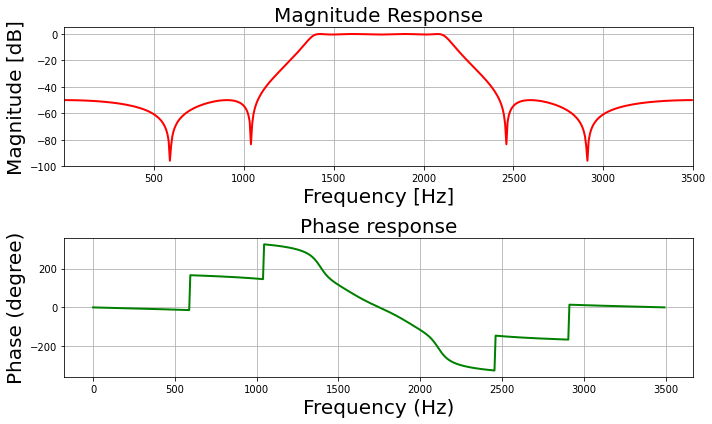

In [44]:
# Depicting visualizations

# Call mfreqz to plot the magnitude and phase response
mfreqz(z, p, Fs)

C:\Users\metodi\AppData\Local\Temp\ipykernel_5920\272780524.py:62: MatplotlibDeprecationWarning:

Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.

C:\Users\metodi\AppData\Local\Temp\ipykernel_5920\272780524.py:71: MatplotlibDeprecationWarning:

Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.



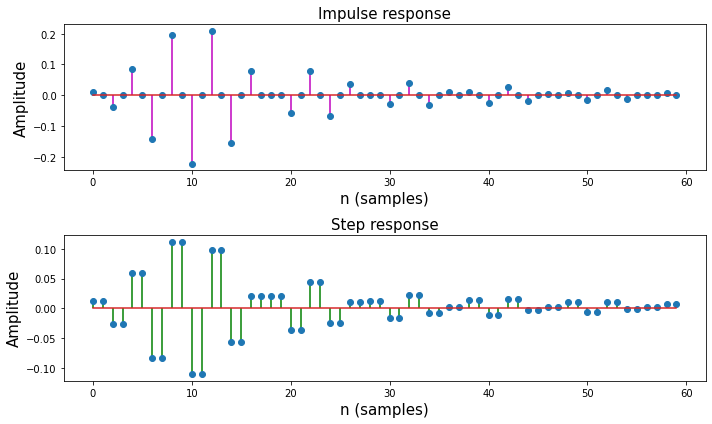

In [45]:
# Call impz function to plot impulse
# and step response of the filter
impz(z, p)